# week 2
## Part 4: Random networks

Exercises (should be completed in a notebook):

- Work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
- Paths. Plot a random network with 200 nodes and an average degree of 1.5. (I suggest using networkx.draw and reading the documentation carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  - Extract the Giant Connected Component, GCC. (Hint: You can use networkx.connected_component_subgraphs <- it works in ealier versions of NetworkX (<2.5) || Otherwise, you can use nx.connected_components(G) and G.subgraph(c).copy())
  - Choose a node at random from the GCC. (Hint: You may want to try random.choice.)
  - Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest networkx.single_source_shortest_path_length)
  - Plot the GCC with the following choice of colors. Starting node black ("#000000"). The nodes 2 steps away red ("#ff0000"). All other nodes blue ("#A0CBE2"). Again, I suggest using networkx.draw() and reading the documentation carefully find out how to color individual nodes.

## Work through NS exercise 3.1 ('Erdős-Rényi Networks')

**Erdős-Rényi Networks**
Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other with probability p = 10–3.

- What is the expected number of links, 〈L〉?
- In which regime is the network?
- Calculate the probability pc so that the network is at the critical point
- Given the linking probability p = 10–3, calculate the number of nodes Ncr so that the network has only one component.
- For the network in (d), calculate the average degree 〈kcr〉 and the average distance between two randomly chosen nodes 〈d〉.
- Calculate the degree distribution pk of this network (approximate with a Poisson degree distribution).

**Generating Erdős-Rényi Networks**
- Relying on the G(N, p) model, generate with a computer three networks with N = 500 nodes and average degree (a) 〈k〉 = 0.8, (b) 〈k〉 = 1 and (c) 〈k〉 = 8. Visualize these networks.

We know from eq (3.2), that the expected number of links are given by
$$
<L> = p \frac{N(N-1)}{2}
$$


In [1]:
p = 0.01
N = 3000

# using eq 3.2 to calculate the expected number of links
L_exp = p*(N*(N-1))/2

print("Expected number of links: ", L_exp)

Expected number of links:  44985.0


To find the regime we calculate <k> or 1/N in reference to p.
we know that 1/N is 1/3000 = 0.00033.

Because $p>1/N$ we have a Supercritical Regime. This can also be supported by that <k> > 1 (see image 3.7d)

In [2]:
k_exp = p*(N-1)
print("Expected average degree <k>: ", k_exp)

Expected average degree <k>:  29.990000000000002


It is in fact a Connected Regime, as <k> is greater than ln(N). and p > ln(N)/N

In [3]:
import numpy as np

print("ln(N): ", np.log(N))
print("ln(N)/N: ", np.log(N)/N)

ln(N):  8.006367567650246
ln(N)/N:  0.0026687891892167486


The critical point 

Critical Point: ‹k› = 1 (p = 1/N , Image 3.7c).

In [4]:
p_Crit_Point = 1/N
print("Critical Point p = 1/N: ", p_Crit_Point)

Critical Point p = 1/N:  0.0003333333333333333


- Given the linking probability p = 10–3, calculate the number of nodes Ncr so that the network has only one component.

From section 3.7 we know "For ‹k› › lnN all components are absorbed by the giant component, resulting in a single connected network."

In [5]:
# print value of p
print("Linking probability p: ", p)

Linking probability p:  0.01


In [6]:
# The network is connected when p › lnN/N which means that 
N_cr_try = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
np.log(N_cr_try)/N_cr_try

# we now know that the network is connected when N > 700
# because p = 0.01 > ln(700)/700 = 0.0091

# more precise
# solve for N when 0.01 = ln(N)/N
from scipy.optimize import fsolve
N_cr = np.ceil(fsolve(lambda N: np.log(N)/N - 0.01, 700))
print("N for which the network is connected: ", N_cr)


N for which the network is connected:  [648.]


Now we want to calculate the average degree 〈kcr〉 and the average distance between two randomly chosen nodes 〈d〉.

In [7]:
# average degree 〈kcr〉
k_cr = p * (N_cr - 1)
print("Average degree <kcr>: ", k_cr)

# average distance between two randomly chosen nodes 〈d〉.
d_exp = np.log(N_cr)/np.log(k_cr)
print("Average distance <d>: ", d_exp)

Average degree <kcr>:  [6.47]
Average distance <d>:  [3.46720948]


Now Calculate the degree distribution pk of this network (approximate with a Poisson degree distribution).

In [ ]:
# calculate the degree distribution pk of this network (approximate with a Poisson degree distribution).
import networkx as nx



/var/folders/xl/6b86r5px17b7wypgtkl2h_w40000gn/T/ipykernel_86970/2663682407.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  G = nx.erdos_renyi_graph(int(N_cr), p)


## Generating Erdős-Rényi Networks
Relying on the G(N, p) model, generate with a computer three networks with N = 500 nodes and average degree 
- (a) 〈k〉 = 0.8 
- (b) 〈k〉 = 1 
- (c) 〈k〉 = 8

Visualize these networks.

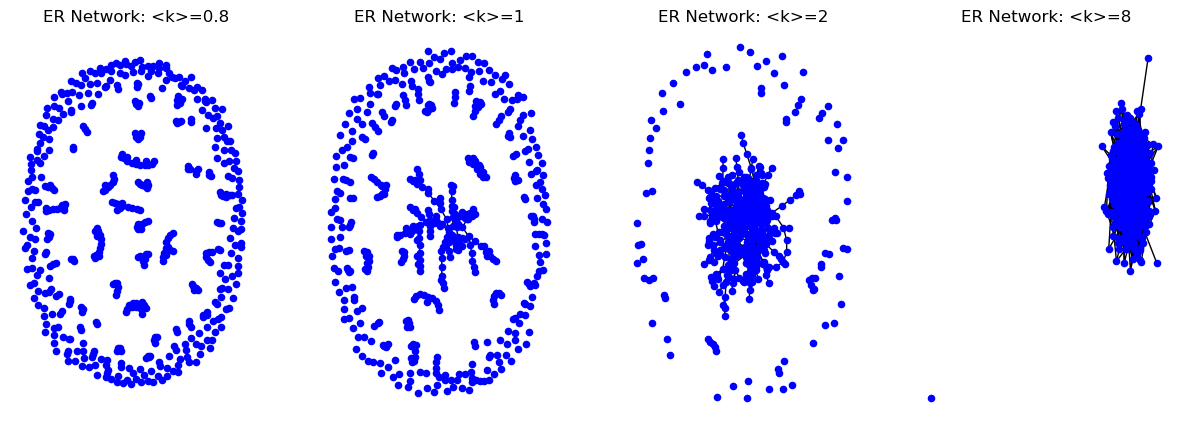

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# listing the parameters
k_list = [0.8, 1, 2, 8]
N = 500

# calculating the linking probability p for each average degree
p_list = [k / (N - 1) for k in k_list]

# constructing and visualizing the networks
G = [nx.erdos_renyi_graph(int(N), p_list[i]) for i in range(len(p_list))]

# plotting the networks
plt.figure(figsize=(15, 5))
for i in range(len(G)):
    plt.subplot(1, len(k_list), i + 1)
    nx.draw(G[i], node_size=20, node_color='blue', with_labels=False)
    plt.title(f'ER Network: <k>={k_list[i]}')
plt.show()



## Plot a random network with 200 nodes and an average degree of 1.5. (I suggest using networkx.draw and reading the documentation carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  - Extract the Giant Connected Component, GCC. (Hint: You can use networkx.connected_component_subgraphs <- it works in ealier versions of NetworkX (<2.5) || Otherwise, you can use nx.connected_components(G) and G.subgraph(c).copy())
  - Choose a node at random from the GCC. (Hint: You may want to try random.choice.)
  - Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest networkx.single_source_shortest_path_length)
  - Plot the GCC with the following choice of colors. Starting node black ("#000000"). The nodes 2 steps away red ("#ff0000"). All other nodes blue ("#A0CBE2"). Again, I suggest using networkx.draw() and reading the documentation carefully find out how to color individual nodes.